In [1]:
%matplotlib inline
from scipy.io import wavfile as wf
from scipy import signal as sgn
import matplotlib.pyplot as plt
import numpy as np
import time

## Part 1a: Convolution of x and h

In [2]:
# initializing arrays as given in the problem, using numpy

x0 = np.array([3, 4, 1, 2, 5, 6, 7, 8, 2, 4])
h0 = np.array([1/4, 1/4, 1/4])
print("x =", x0)
print("h =", h0)

def my_convolve(xin, hin):
    # creating output array y with the correct size
    y = np.zeros([xin.size + hin.size - 1])
    
    # reversing smaller array ("flip")
    h = hin[::-1]

    # adding some zeroes to the beginning ("padding") to make convolution easier
    zeros = np.zeros([h.size - 1])
    x = np.concatenate((zeros, xin, zeros))
    
    # iterating through our output y and calculating the value at each index
    # ("shift"), according to the convolution sum
    for i in np.arange(y.size):
        for j in np.arange(h.size):
            y[i] += x[i+j]*h[j]
    
    # return the output array
    return y
    
print("\nMy Result:\ny =", my_convolve(x0, h0))
print("\nCorrect Result:\ny =", np.convolve(x0,h0))

x = [3 4 1 2 5 6 7 8 2 4]
h = [0.25 0.25 0.25]

My Result:
y = [0.75 1.75 2.   1.75 2.   3.25 4.5  5.25 4.25 3.5  1.5  1.  ]

Correct Result:
y = [0.75 1.75 2.   1.75 2.   3.25 4.5  5.25 4.25 3.5  1.5  1.  ]


## Part 1b:
To do this convolution, I used the flip-and-shift method. The first part, flipping, wasn't necessary in this case since our h had the same value for all n. However, in the general case, we would flip h. I then used a nested for loop to iterate through the output array and incrementally calculate the correct value at each index. The outer for loop repeated N + M - 1 times, where N is the size of our "x" and M is the size of our "h". The inner loop repeats M times. At each index, we perform three multiplications, then add them all together to get the result. This achieves the shifting described above.

I also used zero padding to simplify my algorithm. I added M - 1 zeros to the beginning and end of x. If I didn't do this, the first several iterations of my loop would need additional if statements to consider edge cases.

In general, convolution is a way to represent an output signal y[n] that excites an LTI system with impulse response h[n] with some input signal x[n]. The convolution operation is also useful, because multiplication in teh frequency domain is the same as convolution in the time domain.

# Part 1c: Convolution in O(n) time

In [3]:
def linear_convolve(xin, hin):
    # creating output array y with the correct size
    y = np.zeros([xin.size + hin.size - 1])

    # adding some zeroes to the beginning to make convolution easier
    zeros = np.zeros([hin.size - 1])
    x = np.concatenate((zeros, xin, zeros))
    
    for i in np.arange(y.size):
        y[i] = (x[i] + x[i+1] + x[i+2]) * hin[0]
    
    return y

print("\nResult:\ny =", linear_convolve(x0, h0))
print("\nCorrect result:\ny =", np.convolve(x0,h0))


Result:
y = [0.75 1.75 2.   1.75 2.   3.25 4.5  5.25 4.25 3.5  1.5  1.  ]

Correct result:
y = [0.75 1.75 2.   1.75 2.   3.25 4.5  5.25 4.25 3.5  1.5  1.  ]


If h is a constant filter, we don't need to iterate through h, since all values are equivalent. Although varying the length of h still changes the result of the convolution, this idea is useful when we have constant filters with a smaller length.

## Part 1d: Replicating x and h 100 times

In [4]:
x_long = np.tile(x0, 100)
h_long = np.tile(h0, 100)

reg_start_time = time.time()
my_convolve(x_long, h_long)
reg_time = time.time() - reg_start_time
print("Regular technique took", reg_time, "seconds")

# print("\nresult:\ny =", linear_convolve(x_long, h_long))
# print("\ncorrect result:\ny =", np.convolve(x_long,h_long))

eff_start_time = time.time()
linear_convolve(x_long, h_long)
eff_time = time.time() - eff_start_time
print("Efficient technique took", eff_time, "seconds")

Regular technique took 0.2536637783050537 seconds
Efficient technique took 0.001993417739868164 seconds


The more efficient technique is faster for two main reasons. Firstly, we removed the nested for loop, which likely saves a lot of time by reducing the total number of computations we need. Also, since all values of h are the same, we save some time because not as many memory accesses are needed.

## Part 2: Matched Filters with Cross-Correlation

In [5]:
# reading sampling frequency and loading the .wav files
fs, corcovado_in = wf.read('..\Clips\Corcovado.wav')
fs, clip_in      = wf.read('..\Clips\clip.wav')

C:\Users\ryanm\AppData\Local\conda\conda\envs\myenvname\lib\site-packages\scipy\io\wavfile.py:273: WavFileWarning: Chunk (non-data) not understood, skipping it.
  WavFileWarning)


In [6]:
# using only one channel from the audio signal
clipr      = np.array([i[1] for i in clip_in]).astype(float)
corcovador = np.array([i[1] for i in corcovado_in]).astype(float)
clipl      = np.array([i[0] for i in clip_in]).astype(float)
corcovadol = np.array([i[0] for i in corcovado_in]).astype(float)

I did a few things to prepare each audio signal for correlation. First, I separated the signal into left and right channels, to perform separate analysis on each. Then, I converted to float.

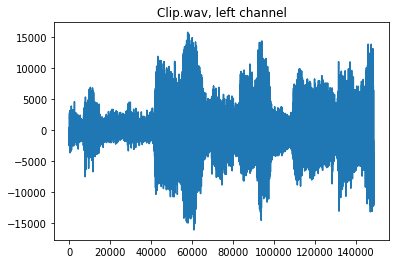

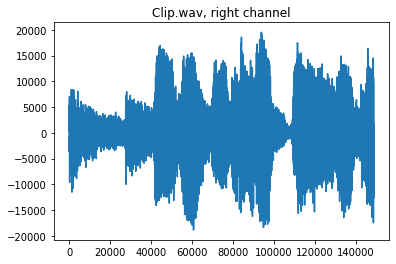

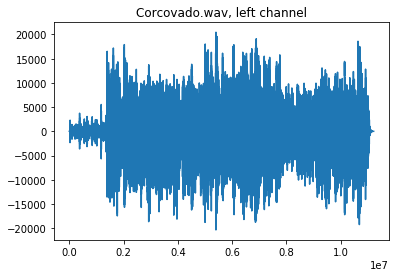

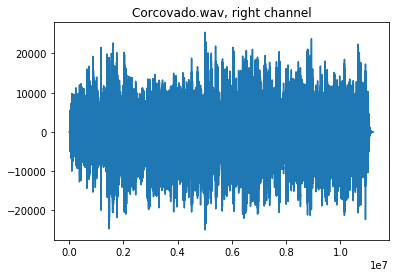

In [7]:
# plotting both audio signals
n = np.arange(0, clipl.size - 1)
plt.plot(n, clipl[n])
plt.title("Clip.wav, left channel")
plt.show()

n = np.arange(0, clipr.size - 1)
plt.plot(n, clipr[n])
plt.title("Clip.wav, right channel")
plt.show()

n = np.arange(0, corcovadol.size - 1)
plt.plot(n, corcovadol[n])
plt.title("Corcovado.wav, left channel")
plt.show()

n = np.arange(0, corcovador.size - 1)
plt.plot(n, corcovador[n])
plt.title("Corcovado.wav, right channel")
plt.show()

In [8]:
# computing the correlation of the left and right channels
corrl = sgn.correlate(clipl, corcovadol)
corrr = sgn.correlate(clipr, corcovador)

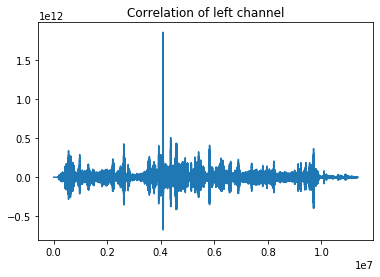

Index of maxmimum value is at [4090986]


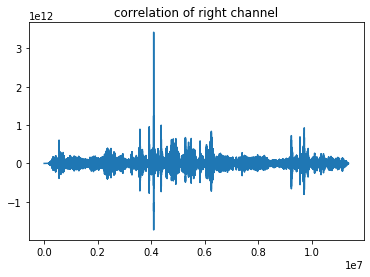

Index of maxmimum value is at [4090986]


In [9]:
left_max  = np.where(corrl == np.amax(corrl))
right_max = np.where(corrr == np.amax(corrr))

plt.plot(corrl)
plt.title("Correlation of left channel")
plt.show()
print("Index of maxmimum value is at", left_max[0])

plt.plot(corrr)
plt.title("correlation of right channel")
plt.show()
print("Index of maxmimum value is at", right_max[0])

From above, we can see that the correlation is maximized around index 4090986 from our corcovado clip. Since Fs is known, and given in samples per second, we can find the number of seconds by dividing the above result by Fs.

In [10]:
clip_time = left_max[0] / fs
print(clip_time)

[92.76612245]


This result makes sense, because we can see the correlation function peaks at around 0.4 * 10^7, which is roughly 1/3 through the audio signal. When we look at the song itself, 1/3 of the way through the song is about 90 seconds.

## Part 3a: Create a regularly spaced vector t from 0 to 1 with a length of 1000 and set f to 2.

In [11]:
t = np.linspace(0, 1, 1000)
f = 2

## Part 3b: Write a for loop to compute the finite sum of above equation to approximate y for a given K value.

In [12]:
# function that approximates y(t) in HW question 3 for a given value of K
def y(t, k_value):
    
    # if k = 1, we can just return the sine wave
    if (k_value <= 1):
        return np.sin(2* np.pi * f * t)
    
    output = 0
    
    # iterate through this loop k times, adding each iteration's value to the
    # previous result. The result is then the sum of all sine waves from k = 1
    # to k = K
    for k in np.arange(1, k_value):
        term = (2 * k) - 1
        numer = np.sin(2 * np.pi * f * t * term)
        output += numer / term
    return output    

## Part 3c: K = 1

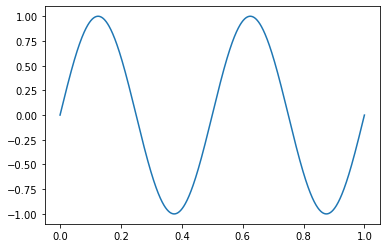

In [13]:
# plotting y(t) when we set K = 1, which should just produce a regular sine wave
plt.plot(t, y(t, 1))
plt.show()  

## Part 3d: K = 3

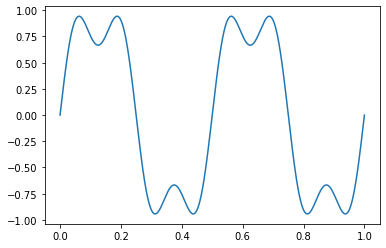

In [14]:
# plotting y(t) when we set K = 3, which produces a graph closer to the desired square wave
plt.plot(t, y(t, 3))
plt.show()  

When we add 3 sine waves together, the result looks closer to a square wave than just the sine wave. However, it still doesn't resemble a square wave.

## Part 3e: K = 9, 50

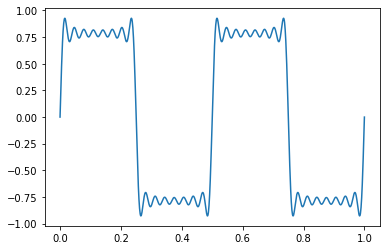

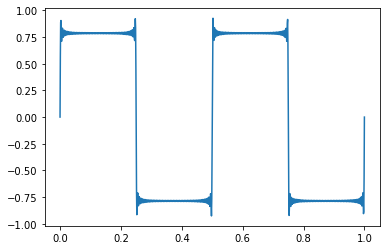

In [15]:
# plotting y(t) when we set K = 9 and 50. As K increases, the approximation of y(t)
# gets closer to the square wave
plt.plot(t, y(t, 9))
plt.show()  


plt.plot(t, y(t, 50))
plt.show()  

The clear trend is that as K increases, the plot gets much closer to the ideal square wave, and the overshoots seem to be less pronounced.

## Part 3f: K = 10^6

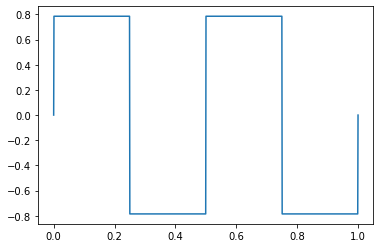

In [16]:
# Setting K to a very large number
plt.plot(t, y(t, 10**6))
plt.show()  

Even as K->infinity, this phenomenon doesn't entirely disappear, it just becomes less apparent. When we zoom in to the jumps, Gibb's phenomenon can still be observed.

## Part 3g: Plots

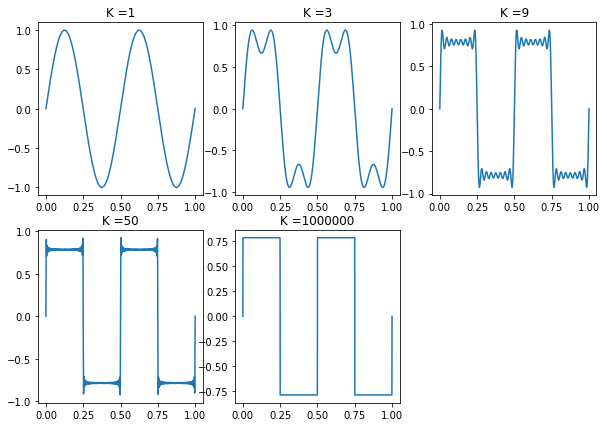

In [17]:
fig = plt.figure(figsize = (10,7))
col = 3
row = 2

k_values = [1, 3, 9, 50, 10**6]

for i in range(1, 6):
    fig.add_subplot(row, col, i)
    title = "K =" + str(k_values[i - 1])
    plt.title(title)
    plt.plot(t, y(t, k_values[i - 1]))

plt.show()

## Part 4: Programming an LTI System

In [18]:
# defining input x(n) as given in the problem
def xin(n):
    return np.sin(0.1 * n)

Plotting the input function x(n) on the range -2 ≤ n ≤ 1000:

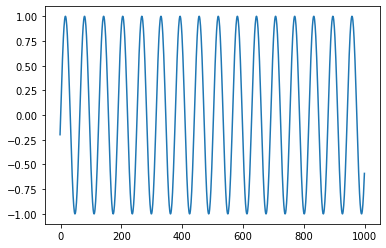

In [19]:
n0 = np.arange(-2, 1000)
plt.plot(n0, xin(n0))
plt.show()

The output of the first LTI system, with impulse response h1(n) = βδ(n-2), can simply be found by taking the convolution of the input x(n) with the impulse response. x(n) is an infinite duration signal, but since we only need to determine y1(n) on the range 0 ≤ n ≤ 1000, we can truncate part of the innput signal to get the correct result. In this case, since we know convolving an input with a shifted delta function simply shifts the input.

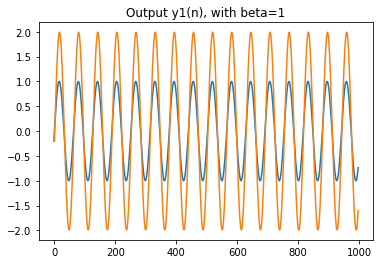

In [20]:
def h1(beta):
    return np.array([0, 0, beta])

def y1(n, x, beta):
    output = my_convolve(x, h1(beta))[n] + x[n]
    return output

n0 = np.arange(-2, 998)
n1 = np.arange(0, 1000)
x = xin(n0)

plt.plot(n0, xin(n0))
plt.plot(n0, y1(n1, x, 1))
plt.title("Output y1(n), with beta=1")
plt.show()

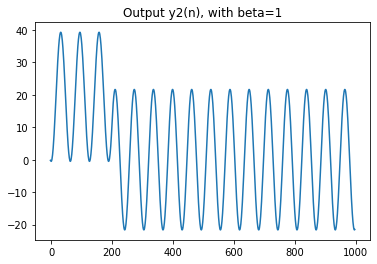

In [21]:
def h2(length):
    return np.ones([length])

y1_in = y1(n1, x, 1)

def y2(y1, h2):
    return my_convolve(y1, h2)

plt.plot(n0, y2(y1(n1, x, 1), h2(200))[n1])
plt.title("Output y2(n), with beta=1")
plt.show()

Input x(n)


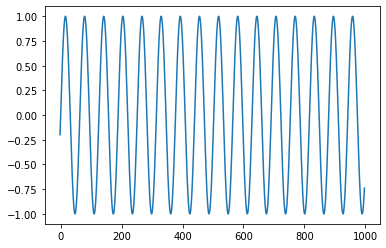

In [22]:
def LTI_system(beta):
    n0 = np.arange(-2, 998)
    n1 = np.arange(0, 1000)
    x = xin(n0)
    
    # plot of y1(n)
    print("Output y1(n), beta =", beta)
    plt.plot(n0, y1(n1, x, beta))
    plt.show()
    
    # plot of y2(n)
    print("Output y2(n), beta =", beta)
    plt.plot(n0, y2(y1(n1, x, beta), h2(200))[n1])
    plt.show()    
    

# plot of input x(n)
print("Input x(n)")
plt.plot(n0, xin(n0))
plt.show()

Output y1(n), beta = -5


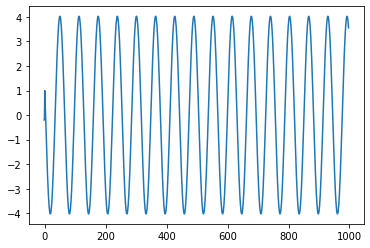

Output y2(n), beta = -5


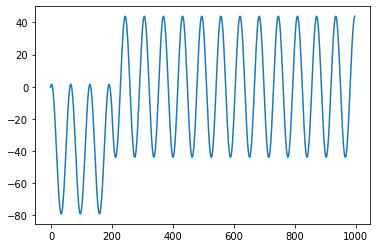

In [23]:
LTI_system(-5)

Output y1(n), beta = -1


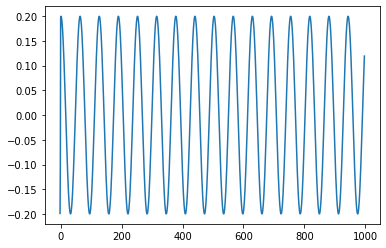

Output y2(n), beta = -1


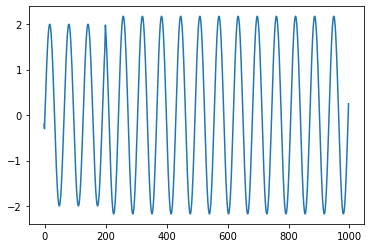

In [24]:
LTI_system(-1)

Output y1(n), beta = 5


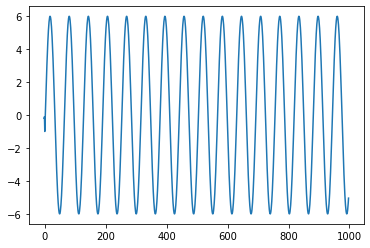

Output y2(n), beta = 5


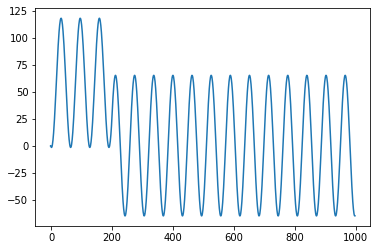

In [25]:
LTI_system(5)

h1(n) essentially shifts x(n) by two, then scales it by a factor of beta. Then, our first output y1(n) is found by adding the original signal x(n)n to the shifted and scaled signal. When beta = -5, the output of h1 is inverted, scaled by 5, and shifted by 2. When we add this back to our original signal, the result is a sinusoid with amplitude of 4, which is the result of the original amplitude + beta. When beta = +5, we see a similar but opposite effect: the resulting amplitude is 1 + 5 = 6. When beta is -1, the amplitude becomes much smaller, because the two signals we are adding together nearly cancel out.

If our original signal x(n) had a lower frequency, then the shift by 2 wouldn't affect our output nearly as much. If the frequency was much larger, the output of y1(n) would essentially just be x(n) + beta * x(n), because a shift by 2 is a smaller portion of the total period. Conversely, if x(n) had a higher frequency, then the effects we observed would be even more pronounced

h2(n) is the difference between two unit step functions, so the resulting impulse response is just a unit step function, except it equals 0 after n=200. As a result, y2(n) is just a copy of y1(n), except the first 200 points in the signal are scaled up or down, depending on the beta value. If beta is a large negative number, the first 200 points are shifted down, and the opposite is true if beta is a large positive number. If beta is closer to zero, then it doesn't have as nearly large of an effect.

The relation between x and y2 is similar to the relationship between x and y1. y2(n) is basically a scaled version of x, with the first 200 units being scaled up or down depending on the value of beta.